### Harmonic Motion Calculator
This script numerically solves the 2nd order differential equation of harmonic motion for a given set of physical parameters and initial conditions.
The output is a graph of the displacement & velocity of the system over time and includes the category of motion: underdamped, 
overdamped, or critically damped. 

Adjust the values of any of the input parameters and see how the system's behavior changes.

In [1]:
from scipy.integrate import odeint
import numpy as np, matplotlib.pyplot as plt

In [2]:
# Input parameters - these values may be adjusted freely
g = 2.11                     # Viscous damping coefficient 
k = 1.5                      # Spring constant (stiffness)
m = 20.0                      # Mass
initial_displacement = 0.3  # How far is the spring stretched? 

The differential equation of harmonic motion is $$ \frac{d^2y}{dt^2} + 2\zeta\omega_{0}\frac{dy}{dt} + \omega_{0}^2y = 0$$

In [3]:
# Set up the 2nd order differential equation of motion as a system of 1st order equations to pass into odeint
def F(y, t):
    zeta = g/(2*np.sqrt(m*k))                   # Define the damping ratio
    w0 = np.sqrt(k/m)                           # Define the natural frequency
    dy = [y[1], -2*zeta*w0*y[1] - w0**2*y[0]]   # Creates a new list with elements from input vector y
   
    return dy # Sets up the ODE y" = -2*(zeta)*w0*y' - w0**2*y for odeint to solve below

The damping ratio is a parameter that describes how the system decays over time. The natural frequency is the frequency at which the system will oscillate without any external force applied.  

*Underdamped* means the system tends to decay slowly, *overdamped* means the system will overshoot its resting position with minimal oscillation, and *critically damped* means the system will return to the equilibrium position as rapidly as possible without overshooting. An *undamped* system will oscillate perpetually.

In [4]:
# Define calculated parameters
behavior = str()             # Initializes an empty string
zeta = g/(2*np.sqrt(m*k))    # Defines the damping ratio, zeta
w0 = np.sqrt(m/k)            # Defines the natural frequency, omega zero

In [5]:
# Categorize behavior
if zeta > 1.0: 
        behavior = 'Overdamped'
elif zeta == 1:
        behavior = 'Critically Damped'
elif zeta == 0.0:
    behavior = 'Undamped'
else: behavior = 'Underdamped'

print(f'Zeta = {zeta:.5f}, Omega = {w0:.5f}, Behavior is "{behavior}"') # Output the values of zeta and omega

Zeta = 0.19262, Omega = 3.65148, Behavior is "Underdamped"


In [6]:
# Solve the ODE and plot the solution
t_min = 0; t_max = 100; dt = 0.01  # Defines the min and max values of time as well as spacing for odeint to run through
t = np.arange(t_min, t_max, dt)   # Creates an array from 0 to t_max with t_max/dt elements

In [7]:
# Initial conditions
initial_conditions = (initial_displacement, 0.0) # Creates a tuple (y(t), t) as the given set of initial conditions.

In [8]:
# Solve ODE - odeint takes the function name and initial conditions and solves it numerically for given t values
y = odeint(F, initial_conditions, t)

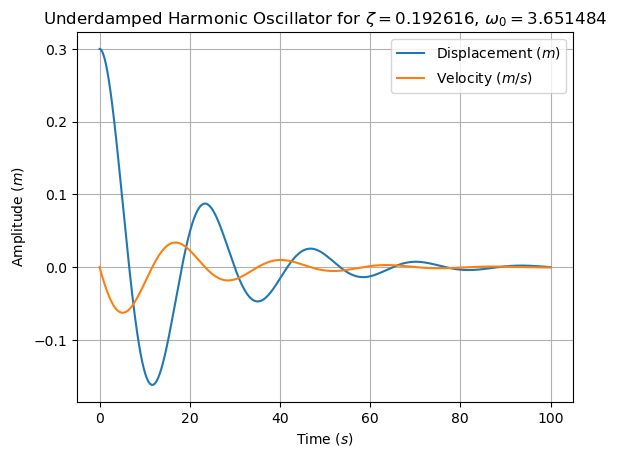

In [9]:
# Format plot
ax = plt.gca()                    # Assigns a variable to the plot object
ax.set_title(behavior + ' Harmonic Oscillator for $\zeta =$' + str(np.round(zeta, 6)) +\
             ', $\omega_0 =$' + str(np.round(w0, 6)) ) # Creates a plot title
ax.set_xlabel("Time $(s)$")       # Generates x-axis label
ax.set_ylabel("Amplitude $(m)$")  # Generates y-axis label
plt.plot(t, y[:,0])                   # Plots solution to ODE
plt.plot(t, y[:,1])                   # Plots derivative of solution to ODE
ax.legend(("Displacement $(m)$", "Velocity $(m/s)$"))   # Adds a legend to the graph after plotting
plt.grid()                            # Adds a background grid
plt.show()
